
1. Load the dataset ( https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
Links to an external site.)
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("parkinsons.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
#let's rename the columns to make it readable 
df.columns = ['PName', 'MFo', 'MFhi', 'MFlo', 'MJitter_percent','MJitter_Abs', 'MRAP', 'MPPQ', 'JDDP',
       'MShimmer', 'MShimmer_dB', 'SAPQ3', 'SAPQ5',
       'MAPQ', 'SDDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
PName              195 non-null object
MFo                195 non-null float64
MFhi               195 non-null float64
MFlo               195 non-null float64
MJitter_percent    195 non-null float64
MJitter_Abs        195 non-null float64
MRAP               195 non-null float64
MPPQ               195 non-null float64
JDDP               195 non-null float64
MShimmer           195 non-null float64
MShimmer_dB        195 non-null float64
SAPQ3              195 non-null float64
SAPQ5              195 non-null float64
MAPQ               195 non-null float64
SDDA               195 non-null float64
NHR                195 non-null float64
HNR                195 non-null float64
status             195 non-null int64
RPDE               195 non-null float64
DFA                195 non-null float64
spread1            195 non-null float64
spread2            195 non-null float64
D2                

#### It is clear from the above that there are no null values in the entire dataset and all readings are numerical except the name.
#### Also, there are 24 variables and 195 rows

In [8]:
df[df.isnull().any(axis=1)]

,PName,MFo,MFhi,MFlo,MJitter_percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,...,SDDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


There are no null values across the variables

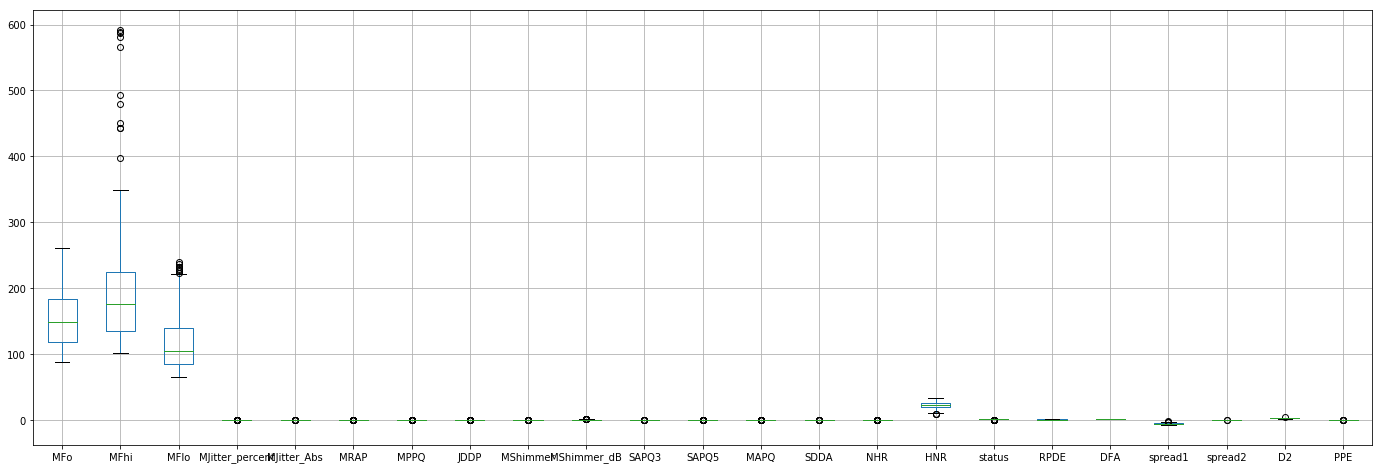

In [9]:
# Verify the outliers for the model
df.boxplot(figsize=(24,8))

There are very few outliers, hence it won't impact the overall model performance.

In [10]:
df.corr()

,MFo,MFhi,MFlo,MJitter_percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,...,SDDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MFo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MFhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MFlo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MJitter_percent,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MJitter_Abs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MRAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MPPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
JDDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MShimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MShimmer_dB,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


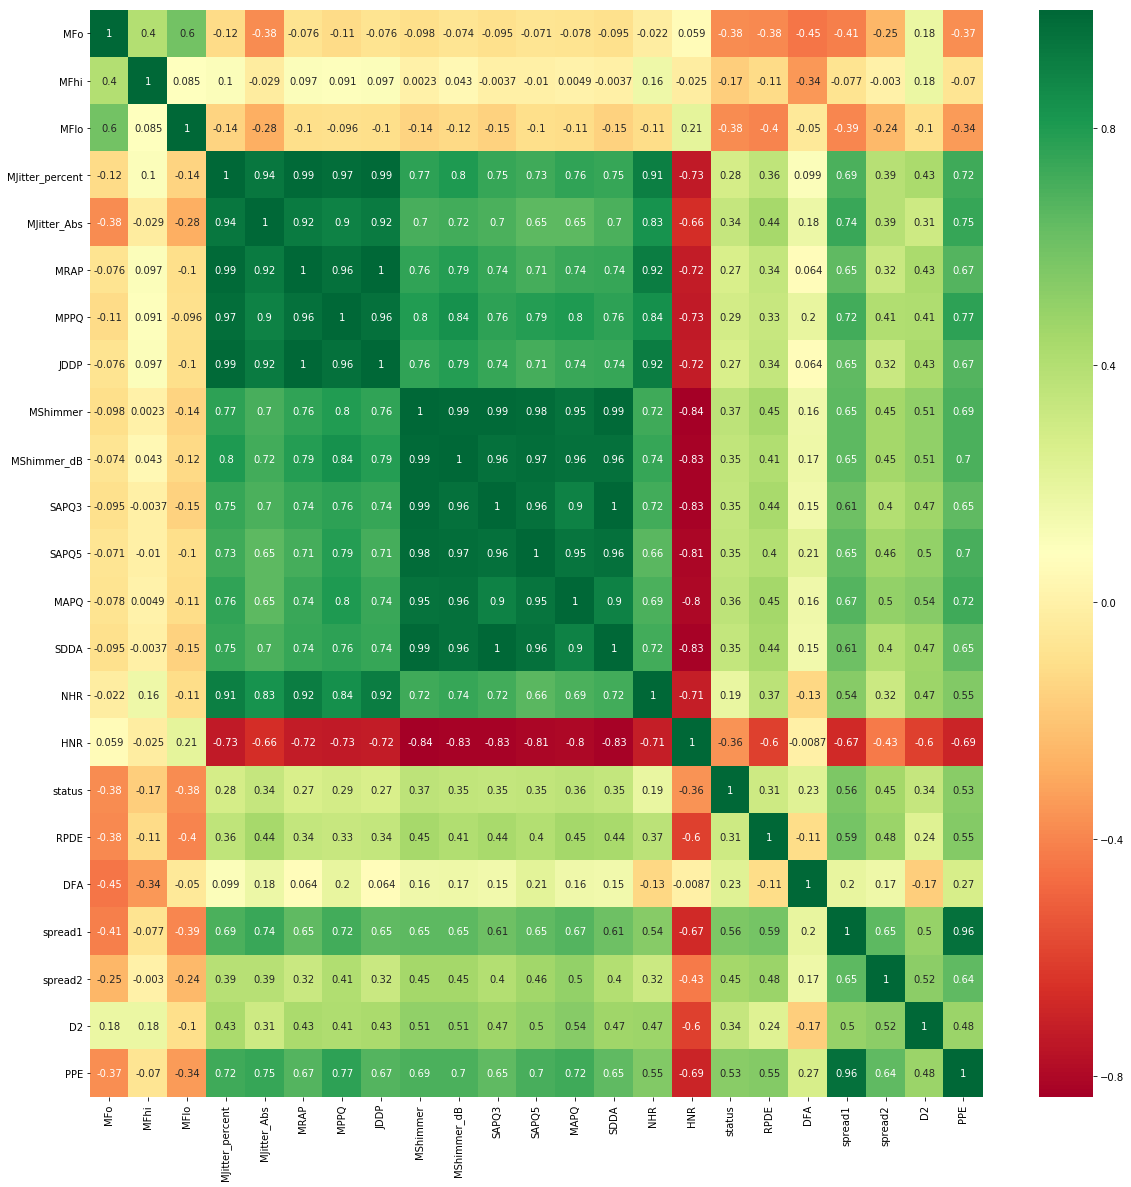

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,SelectPercentile,f_regression

In [13]:
X = df.drop(["status","PName"],axis=1)  #independent columns

y = df["status"]    #target column 

bestfeatures = SelectKBest(score_func=f_regression, k=10)
#X1=X.drop(["spread1"],axis=1)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

featureScores

,Specs,Score
0,MFo,33.286577
1,MFhi,5.478255
2,MFlo,32.612875
3,MJitter_percent,16.192809
4,MJitter_Abs,25.001729
5,MRAP,14.775226
6,MPPQ,17.548533
7,JDDP,14.772666
8,MShimmer,30.122600
9,MShimmer_dB,27.065484


In [14]:
print(featureScores.nlargest(24,'Score'))

              Specs      Score
18          spread1  90.424219
21              PPE  75.803195
19          spread2  50.343165
0               MFo  33.286577
2              MFlo  32.612875
8          MShimmer  30.122600
12             MAPQ  29.536350
15              HNR  29.015927
11            SAPQ5  27.145033
9       MShimmer_dB  27.065484
10            SAPQ3  26.527120
13             SDDA  26.525626
20               D2  25.265912
4       MJitter_Abs  25.001729
16             RPDE  20.310049
6              MPPQ  17.548533
3   MJitter_percent  16.192809
5              MRAP  14.775226
7              JDDP  14.772666
17              DFA  10.952901
14              NHR   7.183270
1              MFhi   5.478255


In [15]:
#So, from the above logic, MFhi has the least score,
#we can ignore the variable MFhis for our modeling. So let us drop this column

#We can also drop the categorical variable PName as it doesn't have any significant impact on the data set
df_new=df.drop(["MFhi","PName"],axis=1)


In [16]:
df_new.head()

,MFo,MFlo,MJitter_percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,SAPQ3,...,SDDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Univariate Analysis

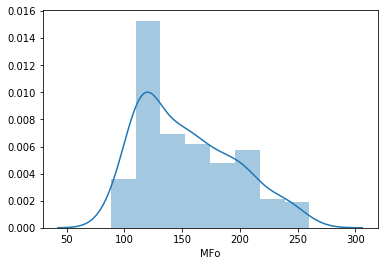

In [17]:
sns.distplot(df_new.MFo, kde=True);

MFo is right skewed with the mean of 150
Most of the values are between 90 and 260 approximately.  
Mean is 154 and Median is 148 

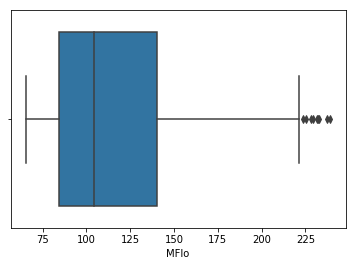

In [18]:
sns.boxplot(df_new.MFlo); 

For the variable MFlo, there are some outlier values. 
Mean is at 110 approximatley and the majority of the values are between 80 and 140


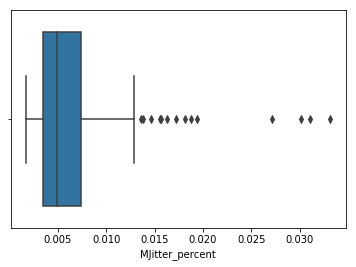

In [19]:
sns.boxplot(df_new.MJitter_percent); 

For the variable MJitter(%), the values are very close to 0.005 . 
There are some outlier value, but majority of the values are between 0.003 to 0.007 with an approximate mean of 0.005


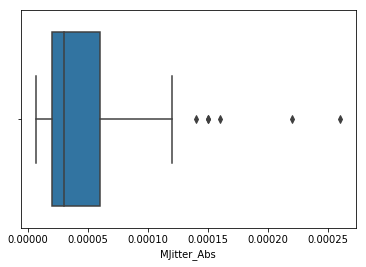

In [20]:
sns.boxplot(df_new.MJitter_Abs); 

There are soem outliers for the variable MJitter(Abs).
The MJitter (abs) and MJitter (%) values both are mostly similar in distribution, with MJitter(%) having more outliers.

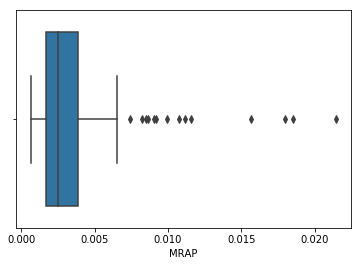

In [21]:
sns.boxplot(df_new.MRAP); 

MRAP field has more outliers with values greater than 0.006.
Mean is at 0.025 and most of the values are between 0.002 to 0.004

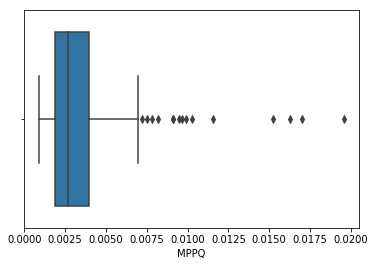

In [22]:
sns.boxplot(df_new.MPPQ); 

MPPQ has outliers that are with values greater than 0.007
It is right skewed 


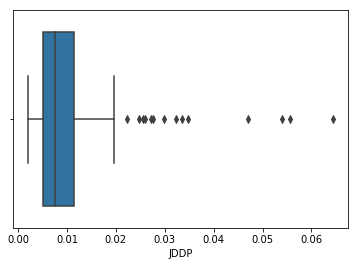

In [23]:
sns.boxplot(df_new.JDDP); 

Values for JDDP field are mostly near 0.002 to 0.015
There are many outliers that are beyond the value 0.02

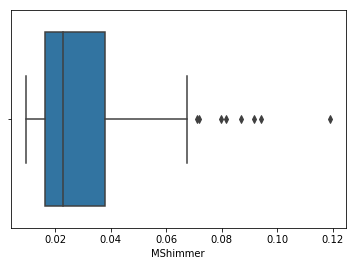

In [24]:
sns.boxplot(df_new.MShimmer); 

MShimmer field has the important values 0.015 and 0.038, wiht outlier values greater than 0.07

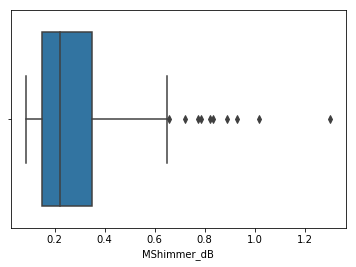

In [25]:
sns.boxplot(df_new.MShimmer_dB); 

MShimmer_dB has some outliers with values greater than 0.7


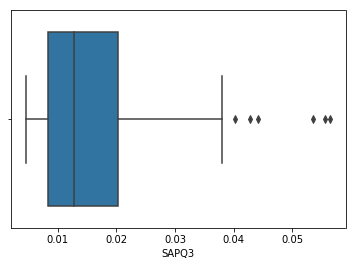

In [26]:
sns.boxplot(df_new.SAPQ3); 

SAPQ3 has very few outliers.  It's main values are between 0.008 to 0.02
Median is approximately at 0.04

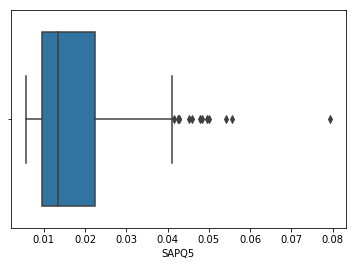

In [27]:
sns.boxplot(df_new.SAPQ5); 

SAPQ5 has outlier values that are above 0.043

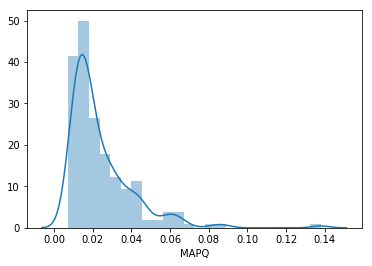

In [28]:
sns.distplot(df_new.MAPQ); 

MAPQ has few outliers with values above 0.09
it is right skewed and mean is approximately at 0.023

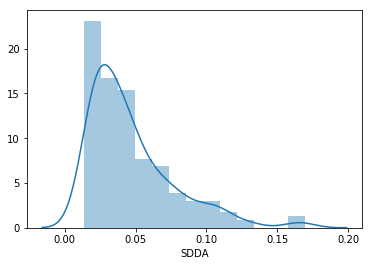

In [29]:
sns.distplot(df_new.SDDA); 

SDDA is right skewed with very few outliers

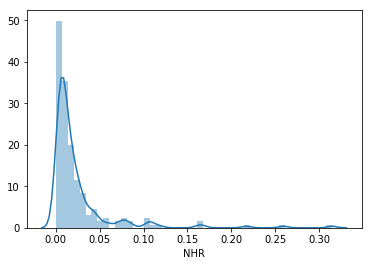

In [30]:
sns.distplot(df_new.NHR); 

NHR is right skewed with approximately 80 people having the values between 0.01 to 0.03

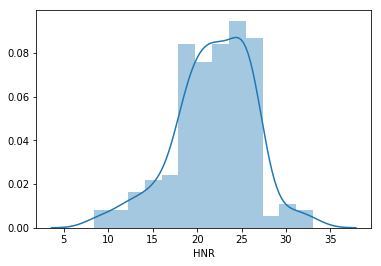

In [31]:
sns.distplot(df_new.HNR); 

HNR attribute is left skewed with no major outliers
Around 120 patients have the HNR between 20 to 32

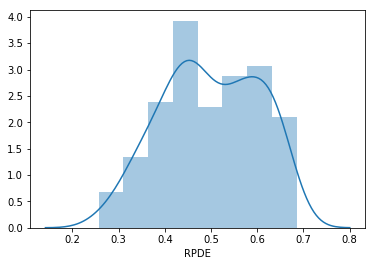

In [32]:
sns.distplot(df_new.RPDE); 

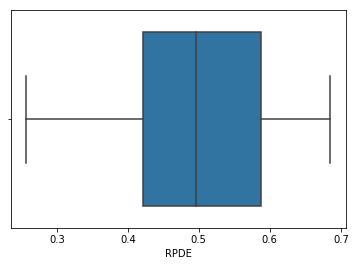

In [33]:
sns.boxplot(df_new.RPDE)

RDPE has very narrow range of values. This diagram is not giving enough information.

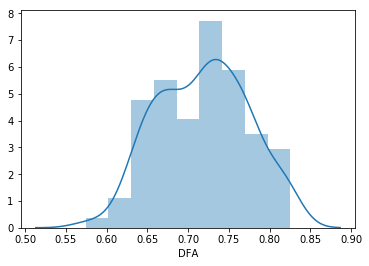

In [34]:
sns.distplot(df_new.DFA); 

DFA is Left skewed  with mean value of 0.71 

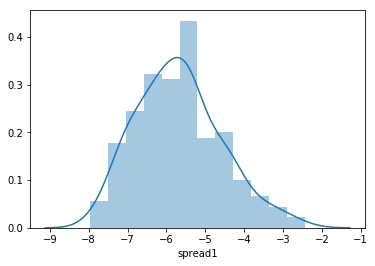

In [35]:
sns.distplot(df_new.spread1); 

spread1 is right skewed

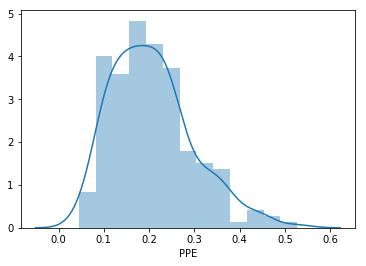

In [36]:
sns.distplot(df_new.PPE); 

PPE is right skewed.

### Bi-Variate analysis

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


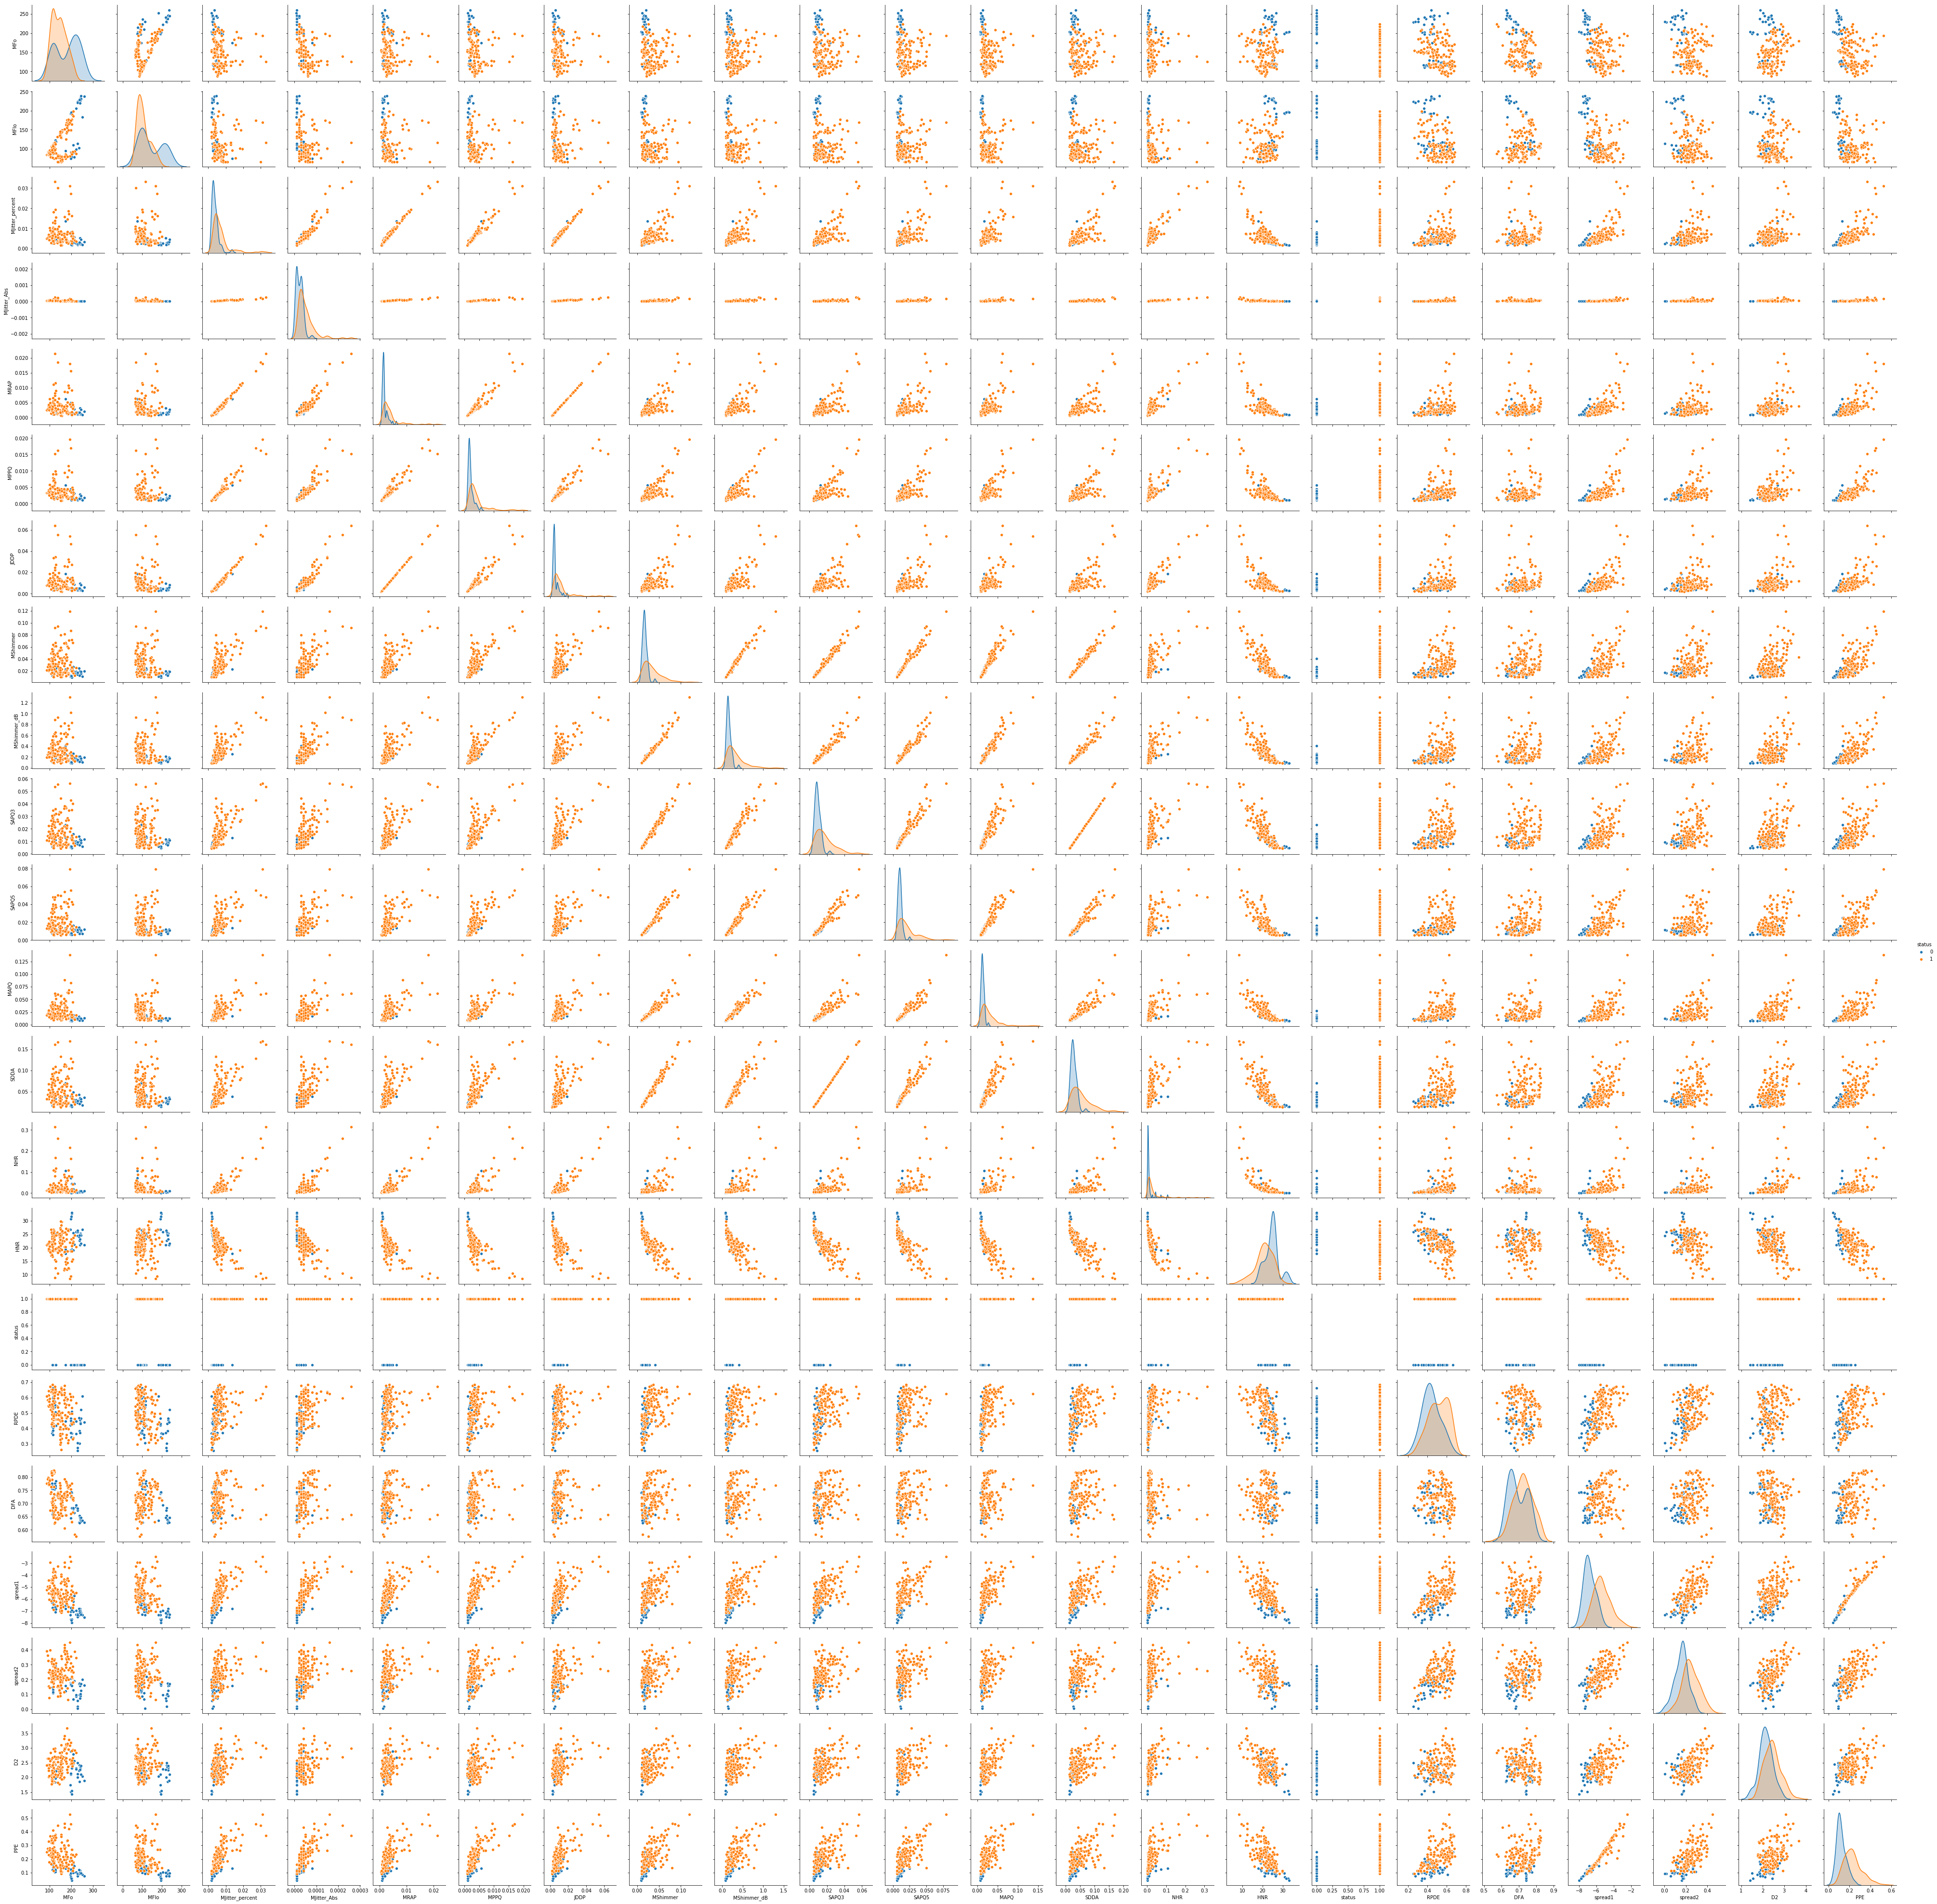

In [37]:
sns.pairplot(data=df_new,hue="status")

Observations from the Pairplot;
As the objective is to findout the variables that have impact on the status of Parkinson disease. Let us compare the varaiables against the status field
1. spread2 variable has a strong correlation with the status. 
2. MFo,MFlo is unable to form any regression or strong correlation with the status field. 
3. Except HNR & NHR all other variables have formed a moderate / strong correlation with the status field. Hence can influence the outcome of status variable
4. RPDE has extreme values.

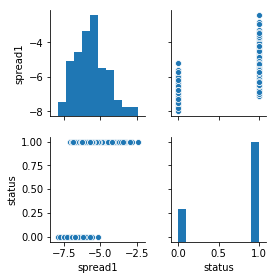

In [38]:
sns.pairplot(df_new,vars=["spread1","status"],height=2)

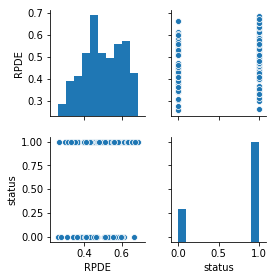

In [39]:
sns.pairplot(df_new,vars=["RPDE","status"],height=2)

Unable to make out any observation from the RPDE data. Because, the values seems to be very low.

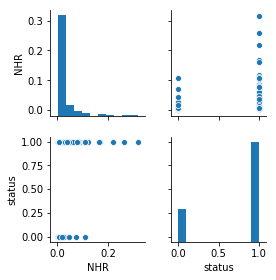

In [40]:
sns.pairplot(df_new,vars=["NHR","status"],height=2)

NHR was having a correlation with the status , but there are seems to be uncertainity in the distribution. 

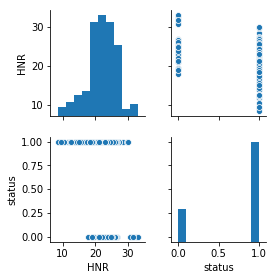

In [41]:
sns.pairplot(df_new,vars=["HNR","status"],height=2)

HNR values are coming down as the status values are increasing.  

In [42]:
X.head()


,MFo,MFhi,MFlo,MJitter_percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,...,MAPQ,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Model Creation

In [43]:
X = df.drop(["status","PName"],axis=1)  #independent columns

y = df["status"]    #target column 
X.shape,y.shape
X.head()

,MFo,MFhi,MFlo,MJitter_percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,...,MAPQ,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [44]:
 
X.shape,y.shape


((195, 22), (195,))

In [45]:
X.head()

,MFo,MFhi,MFlo,MJitter_percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,...,MAPQ,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [46]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
from scipy.stats import zscore

df_attr = X
df_attr_z = df_attr.apply(zscore)

array = df_attr_z.values
array


array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [49]:
regressor = dt_model = DecisionTreeClassifier(criterion = 'entropy' )
regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_
feature_importances

array([0.33132213, 0.08322777, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06667766, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04446698, 0.        , 0.17454008, 0.        ,
       0.        , 0.29976538])

In [50]:
feature_names = X.columns
print(feature_names)
k = 8
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])
print(feature_names[top_k_idx], feature_importances)

Index(['MFo', 'MFhi', 'MFlo', 'MJitter_percent', 'MJitter_Abs', 'MRAP', 'MPPQ',
       'JDDP', 'MShimmer', 'MShimmer_dB', 'SAPQ3', 'SAPQ5', 'MAPQ', 'SDDA',
       'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
[0.33132213 0.08322777 0.         0.         0.         0.
 0.         0.         0.         0.         0.06667766 0.
 0.         0.         0.         0.         0.04446698 0.
 0.17454008 0.         0.         0.29976538]
Index(['MFo', 'PPE', 'spread1', 'MFhi', 'SAPQ3', 'RPDE', 'MShimmer', 'MFlo'], dtype='object') [0.33132213 0.08322777 0.         0.         0.         0.
 0.         0.         0.         0.         0.06667766 0.
 0.         0.         0.         0.         0.04446698 0.
 0.17454008 0.         0.         0.29976538]


In [51]:
train_char_label = ['No', 'Yes']

In [52]:
from IPython.display import Image  
from sklearn import tree
from os import system


test_file = open('C:\Samples\parkinson.dot','w')
dot_data = tree.export_graphviz(regressor, out_file=test_file, feature_names =(['spread2','MPPQ','MJitter_Abs','MAPQ','MJitter_Percent','SAPQ5','MShimmer_dB','MShimmer','HNR','JDDP','MRAP','SDDA','SAPQ3','D2','NHR','DFA','RPDE','PPE'
,'MFo','MFlo','spread1','MFhi']),class_names = list(train_char_label) )

test_file.close()



In [53]:
system("dot -Tpng C:\Samples\parkinson.dot -o C:/Samples/parkinson.png")

1

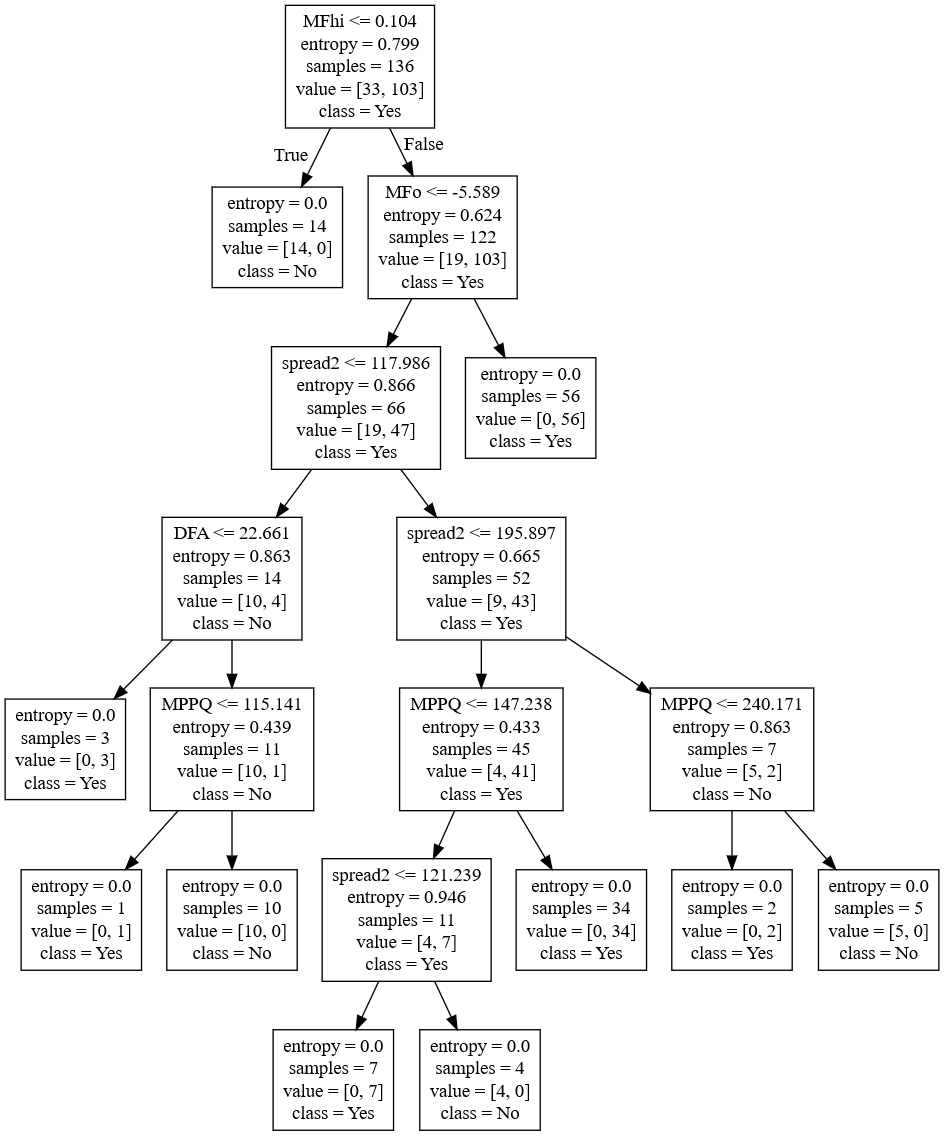

In [54]:
Image(filename=r"C:/Samples/parkinson.png") 

In [55]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [56]:
y_predict_DT = dt_model.predict(X_test)

In [57]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8983050847457628


In [58]:
print(metrics.confusion_matrix(y_test, y_predict_DT))

[[11  4]
 [ 2 42]]


# Regularizing the decision tree

In [59]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4,min_samples_leaf=1)
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
parkinson_tree_regularized = open('C:\\samples\\parkinson_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= parkinson_tree_regularized, feature_names = list(X_train), class_names = list(train_char_label))
parkinson_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                      Imp
MFo              0.331322
MFhi             0.083228
MFlo             0.000000
MJitter_percent  0.000000
MJitter_Abs      0.000000
MRAP             0.000000
MPPQ             0.000000
JDDP             0.000000
MShimmer         0.000000
MShimmer_dB      0.000000
SAPQ3            0.066678
SAPQ5            0.000000
MAPQ             0.000000
SDDA             0.000000
NHR              0.000000
HNR              0.000000
RPDE             0.044467
DFA              0.000000
spread1          0.174540
spread2          0.000000
D2               0.000000
PPE              0.299765


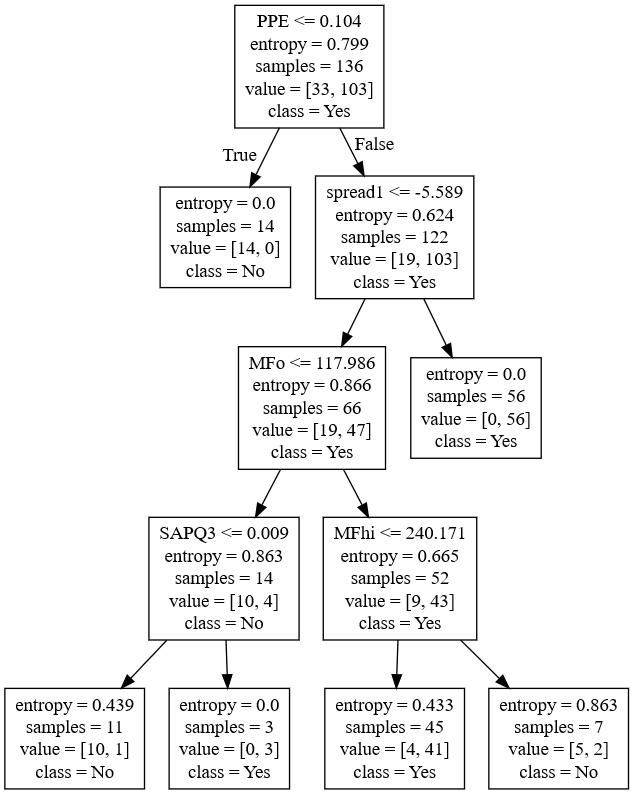

In [61]:
system("dot -Tpng C:\\samples\\parkinson_tree_regularized.dot -o C:/samples/parkinson_tree_regularized.png")
Image("C:\\samples\\parkinson_tree_regularized.png")

In [62]:
y_predict_DTR = reg_dt_model.predict(X_test)

In [63]:
reg_dt_model.score(X_test, y_test)

0.864406779661017

In [64]:
print(metrics.confusion_matrix(y_test, y_predict_DTR))

[[11  4]
 [ 4 40]]


### After regularization the model accuracy has increased.


# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 51)
rfcl = rfcl.fit(X_train,y_train)

In [66]:
y_predict_rndForest = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict_rndForest))

0.9322033898305084
[[11  4]
 [ 0 44]]


In [67]:
dfNew=pd.DataFrame(columns=["Actual"])

In [68]:
dfNew["Actual"]=y_predict_DT

In [69]:
dfNew["y_predict_DTR"]=y_predict_DTR
dfNew["y_predict_rndForest"]=y_predict_rndForest

In [70]:
dfNew

,Actual,y_predict_DTR,y_predict_rndForest
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1
9,1,0,1
